In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.dummy import DummyRegressor 
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("dataset_cleaned.csv")

In [4]:
X = df[['age', 'genre', 'IMC', 'enfants', 'fumeur']] # Variables explicatives
#ou X = df.drop["charges"]
y = df["charges"]  # Variable cible

## Dummy modèle

In [35]:
#modele tres simple de reference
#ne cherche pas à comprendre les données ou faire analyse complexes
#predit de maniere basique la meme valeur en sa basant sur moyenne/médiane
#son but : avoir un pt de comparaison avec un modele plus complexe
#si modele plus complexe ne fait pas mieux : il n'a pas bien appris ou données inutiles


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#séparation des données
#test_size = repartition des données entre train/test
#random_state = "seed" pour obtenir la même division entre test/train à chaque execution

In [31]:
dummy_mean = DummyRegressor(strategy = 'mean')
#création du modele qui prédira moyenne de la valeur cible (y_train)

In [32]:
dummy_mean.fit(X_train, y_train)
#calcule de la moyenne de la variable cible
#la mémorise comme sa prédiction pour toute entrée future
#ne tient pas compte des variables explicatives (X_train)
#a ce stade, aucune relation entre les deux X_train / y_train


DummyRegressor()

In [33]:
y_pred_dummy = dummy_mean.predict(X_test)
#predit les valeurs pour X_test
#mais comme le modele utilise "mean" : retourne la même valeur de y_train pour chaque X_test

In [36]:
#evaluation du modele
mae = mean_absolute_error(y_test, y_pred_dummy)
mse = mean_squared_error(y_test, y_pred_dummy)
r2 = r2_score(y_test, y_pred_dummy)

print(f"MAE (Dummy): {mae}")
print(f"MSE (Dummy): {mse}")
print(f"R² (Dummy): {r2}")

MAE (Dummy): 9861.797880026175
MSE (Dummy): 185298141.68739662
R² (Dummy): -0.008391982350864469


## RL

In [11]:
#création d'une instance
regressor = LinearRegression()


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
regressor.fit(X_train, y_train) 
#entrainement du modele avec données d'entrainement


LinearRegression()

In [14]:
print(regressor.coef_) 
#coefficients du modele de regression : les poids associés à chaque var explicative : theta1,theta2...
print(regressor.intercept_) 
#ordonné à l'origine : theta0 : valeur de y lorsque les var expl sont a 0

[  249.09521752   -85.02704092   305.59649519   537.9633666
 23051.36812442]
-11221.051661570833


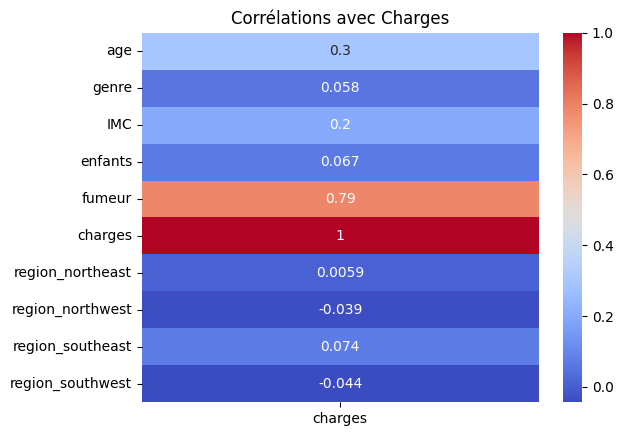

In [ ]:
# Ajouter y dans le dataframe pour inclure la variable cible
df['charges'] = y

# Matrice de corrélation
corr_matrix = df.corr()

sns.heatmap(corr_matrix[['charges']], annot=True, cmap='coolwarm')
plt.title('Corrélations avec Charges')
plt.show()

#matrice de corrélation pour : 
#   identifier dépendances entre variables
#   reperer variable multicolinéaires : coef trop proche de 1 ou -1 : pose probleme à RL
#   selectionner variables importances
#   comprendre patterns des données


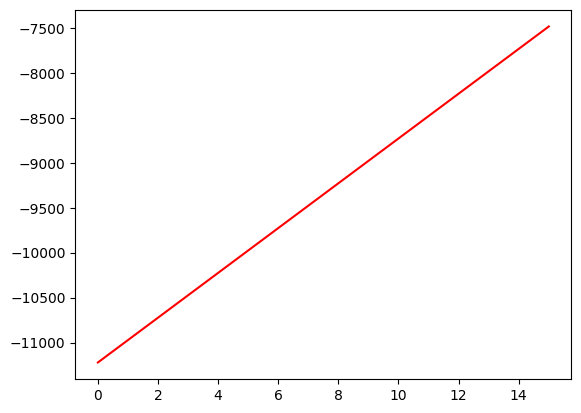

In [16]:
ordonne = np.linspace(0,15,1000)
plt.plot(ordonne, regressor.coef_[0]*ordonne+regressor.intercept_,color="r")
#coef de la droite : regressor.coef ; ordonne a l'origine : regressor_intercept

In [17]:
#prediction sur la base test
y_predict = regressor.predict(X_test)

In [18]:
#metrique
#comparaison entre y_predict et y_test(valeur réelles) pour évaluer performance du modele

print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
print("MSE:", metrics.mean_squared_error(y_test, y_predict))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_predict))) #racine carré MSE
print("R²:", metrics.r2_score(y_test, y_predict))

MAE: 4198.111800474601
MSE: 35901914.11461983
RMSE: 5991.820601004325
R²: 0.8046218811772661


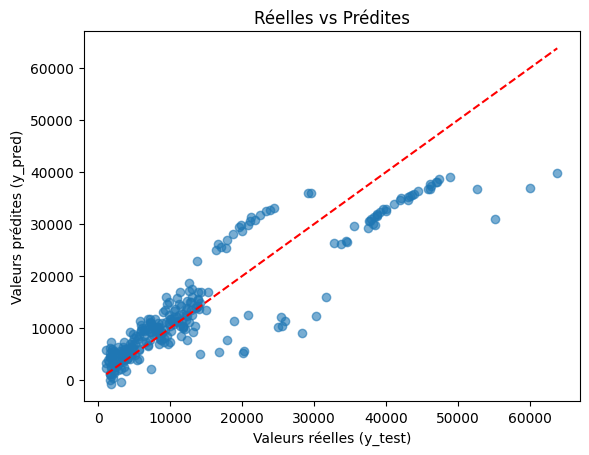

In [ ]:
plt.scatter(y_test, y_predict, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ligne idéale
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Valeurs prédites (y_pred)")
plt.title("Réelles vs Prédites")
plt.show()

#+ pts sont alignés sur ligne rouge + modele est précis


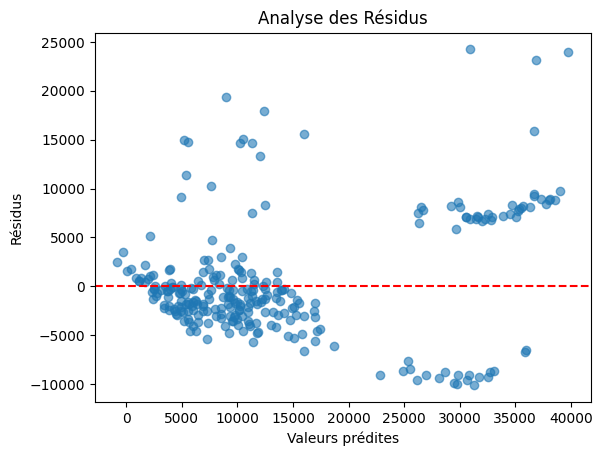

In [ ]:
residus = y_test - y_predict
plt.scatter(y_predict, residus, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Ligne des résidus nuls
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Analyse des Résidus")
plt.show()

#pour examiser erreur de prediction
#y_test = valeur réelle de variable cible
#y_predict = valeur prédites 
#residus = écart entre valeur réelles/prédites
#+ résidus sont proche de 0 + prédiction est bonne
#si répartis autour ligne rouge (résidus nuls) : pas de biais systematique et erreur sont aléatoires
#biais systematique : peu importe les données modele va donner sous estimer systématiquement

## Ridge

In [101]:
# X = PolynomialFeatures(degree = 10, include_bias=False).fit_transform(X)

In [47]:
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5).fit(X_train, y_train)
print("Meilleur alpha :", ridge.alpha_)

#ridgeCV : variante de ridge qui inclut validation croisée pour determiner la meilleure valeur de alpha
#alpha : minimise erreur de prediction sur données de test pendant entrainement 
#cv : nb de plis dans la validation croisée, 4 pour entrainement 1 pour validation
#cv permet de choisir le meilleur alpha en fonction des résultats

Meilleur alpha : 1.0


In [ ]:
model = Ridge(alpha=1.0, random_state=42)
model.fit(X_train, y_train)

Ridge(random_state=42)

In [49]:
y_pred = model.predict(X_test)

In [52]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('Coefficient R2:', model.score(X_test, y_test))


MAE: 4215.165133118798
MSE: 36076331.51462652
Coefficient R2: 0.8036727021615048


In [74]:
#RidgeCV : que pour alpha
#GridSearchCV : approche plus générale pour optmiser plusieurs hyperparamètres

# Grille d'hyperparamètres
parametre = {'alpha': [0.1, 1.0, 10.0, 100.0]} 

# Initialisation du modèle
ridge = Ridge(random_state=0)

# Configuration de GridSearchCV
grid = GridSearchCV(estimator=ridge, param_grid=parametre, cv=5, scoring='neg_mean_squared_error')
#scoring : choix de metrique pour evaluer perf modele
#r2 : evaluer exactitute du modele
#mse : souvent utilisé : minimise impact des grandes erreurs
#mae : evaluation simple et robuste sans penaliser outliers


# Entraînement
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=0),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [76]:
# Faire des prédictions avec le modèle ayant le meilleur alpha
y_pred = grid.predict(X_test)

# métriques
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Meilleur alpha : ", grid.best_params_['alpha'])
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

Meilleur alpha :  1.0
MAE: 4215.165133118798
MSE: 36076331.51462652
R²: 0.8036727021615048


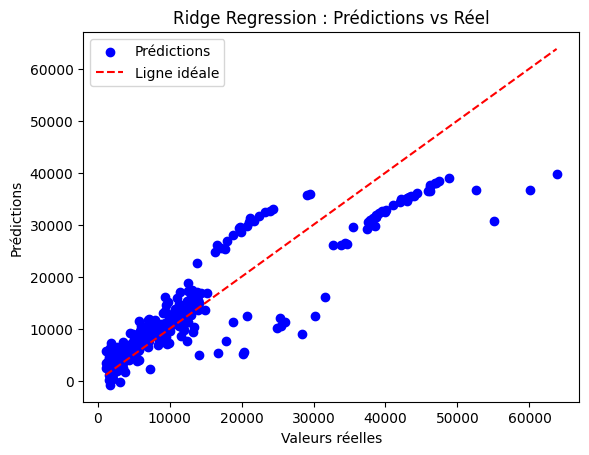

In [66]:
plt.scatter(y_test, y_pred, c='blue', label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ligne idéale')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.legend()
plt.title('Ridge Regression : Prédictions vs Réel')
plt.show()


## Lasso

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1, 10, 50, 100]}
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

print("meilleur alpha:", lasso_cv.best_params_)


NameError: name 'X_train' is not defined

In [90]:
lasso = Lasso(alpha = 50)
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"MSE: {mse_lasso}")
print(f"MAE: {mae_lasso}")
print(f"R²: {r2_lasso}")


MSE: 36309905.59671533
MAE: 4232.109556174507
R²: 0.8024015926429826


In [ ]:
import seaborn as sns

residuals = y_test - lasso.predict(X_test)
sns.histplot(residuals, kde=True)

#si residu suivent loi normale : erreur sont distribuées aléatoirement autour de 0
#donc prediction fiables et non biaisées

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, lasso.predict(X_test), alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Prédictions Lasso vs Réelles")
plt.show()


## ElasticNet

In [6]:
# Create an instance of the ElasticNet model
elastic_net = ElasticNet(alpha=0.5, l1_ratio=1)
#li_ratio : melange entre lasso/ridge
#=0 : ridge; =1 : lasso ; =0,5 : les 2

# Fit the model to the training data
elastic_net.fit(X_train, y_train)

# Make predictions on the test data
y_pred_elas = elastic_net.predict(X_test)


# Print the coefficients of the trained model
mse_elas = mean_squared_error(y_test, y_pred_elas)
mae_elas = mean_absolute_error(y_test, y_pred_elas)
r2_elas = r2_score(y_test, y_pred_elas)

print('Elastic Net coefficients:')
print(elastic_net.coef_)
#coef des var explicatives apres train, ils refletent relation entre var expl et var cible
print(f"MSE: {mse_elas}")
print(f"MAE:{mae_elas}")
print(f"R2:{r2_elas}")

NameError: name 'X_train' is not defined

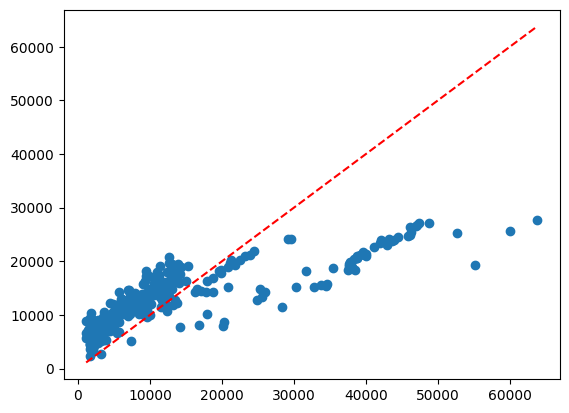

In [102]:
plt.scatter(y_test, y_pred_elas)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ligne idéale
plt.show()


## Prédiction

In [ ]:

# Faire des prédictions sur les données de test
y_pred = lm.predict(X_test)

# Affichage des prédictions
print("Les prédictions sont :", y_pred)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("R² :", r2)
